## Realxed A-optimal experiment design

아래와 같이 생성된 데이터가 있습니다.

In [1]:
using Random
Random.seed!(2023)
n = 5; # 추정해야 하는 parameter의 개수
p = 20; # 가능한 실험의 가짓수
m = 30; # 실험 횟수
V = randn(n,p); #V의 각 열은 v1,...,vp 벡터를 나타냅니다.

Q1. 다음과 같이 표현된 $\lambda \in \mathbb{R}^p$에 대한 optimization 문제를 해결하세요.

$$
\begin{array}{ll}
    \text{minimize}   & (1/m)\mathbf{tr}\left(\sum_{i=1}^p \lambda_i\nu_i\nu_i^T\right)^{-1} \\
    \text{subject to} & \mathbf{1}^T\lambda =1,\,\,\lambda\succeq 0
\end{array}
$$


Q2. 위 문제의 solution $\lambda^*$는 $m_1,\,m_2,\,...\,,m_p$에 대한 아래 A-optimal design problem의 solution의 lower bound가 됩니다. 그 이유는 무엇일까요? (세션의 relaxed experiment design 부분에서 나왔습니다!)

$$
\begin{array}{ll}
    \text{minimize}   & \mathbf{tr}\left(\sum_{i=1}^p m_i\nu_i\nu_i^T\right)^{-1} \\
    \text{subject to} & m_1 + m_2 +\,...\,+ m_p = m ,\,\, m \in \left\{0,1,\,...\,,m\right\}
\end{array}
$$

Q3. solution을 구한 후 $\hat{m}_i = \mathbf{round}(m\lambda_i^*)$를 구하세요. 이 정수 $\hat{m}_i$들에 대한 sub-optimal objective value를 계산하고, 이 upper bound와 lower bound의 차이를 구하세요. 

#유의사항: Convex 패키지는 trace로 구성된 목적함수를 인식하지 못하므로, matrix fractional function (교재 76p example 3.4 참조)을 이용하여 formulation해줘야 합니다. kth unit vector $e_k$에 대해 reformulation하면 위의 목적함수는 다음과 같이 바뀝니다. 사실 trace를 다른 형태로 표현한 것에 불과하다는 점이 보입니다.

$$ (1/m)\sum_{k=1}^n e_k^T \left(\sum_{i=1}^p \lambda_i\nu_i\nu_i^T\right)^{-1}e_k $$

#hint: 벡터 x, 행렬 P에 대해 함수 matrixfrac(x, P)는 $x^TP^{-1}x$를 리턴합니다.

In [2]:
using Convex, SCS
using LinearAlgebra

In [3]:
#obj 함수 정의와 constraints를 채우세요.
λ = Variable(p)  
obj = 0
    
for k in 1:n #바깥쪽 k에 대한 시그마의 표현
    ek = zeros(n,1) #kth unit vector를 표현하는 것입니다.
    ek[k] = 1 
    obj += (1/m) * matrixfrac(ek, V * diagm(λ) * V')
end 

problem = minimize(obj)

problem.constraints += sum(λ)==1
problem.constraints += λ >= 0

solve!(problem, SCS.Optimizer)

sol_lambda = evaluate(λ);

------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 26, constraints m: 202
cones: 	  z: primal zero / dual free vars: 77
	  l: linear vars: 20
	  s: psd vars: 105, ssize: 5
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 1551, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|5.29e+000 1.00e+000 1.17e+000 -3.03e-001 1.00e-001 1.10e-002 
   100|4.93e-005 6.96e-006 1.47e-005 1.69e-001 1.00e-001 2.69e-002

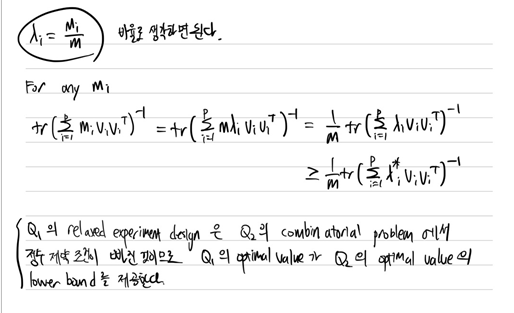

In [11]:
m_hat = round.(m * sol_lambda)

20-element Vector{Float64}:
  4.0
 -0.0
 -0.0
  5.0
 -0.0
 -0.0
 -0.0
 -0.0
  3.0
 -0.0
 -0.0
 -0.0
  6.0
 -0.0
 -0.0
  4.0
  1.0
 -0.0
  4.0
  3.0

In [12]:
subopt = tr(inv(V * LinearAlgebra.diagm(sol_lambda) * V'))

5.060762850139485

In [13]:
subopt - evaluate(obj)

4.892070755134835